<a href="https://colab.research.google.com/github/klee9748/2021-4-3/blob/main/HRE_I_SIFT_SURF_ORBApr192021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HRE I SIFT-SURF-ORB
#Apr 19 2021.ipynb
# Setup & Import



In [ ]:
!pip uninstall opencv-python -y
!pip uninstall opencv-contrib-python -y
!pip install opencv-contrib-python==4.4.0.44
#!apt-get -qq install - y libsm6 libxext6 && pip install -q -U opencv-python
print("good")

Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Successfully uninstalled opencv-contrib-python-4.1.2.30
     |████████████████████████████████| 55.7MB 75kB/s 
good


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 
import matplotlib.pyplot as plt
from random import randrange
import sys
from PIL import Image, ImageChops
import imutils
import os 
print ("all good")

all good


In [ ]:
print (cv2 .__version__)

4.4.0


## Get Images

In [ ]:
import sys
if 'google.colab' in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive/',force_remount=True)
  path= '/content/drive/My Drive/Research/Photo/Test2/'
  ! ls '/content/drive/My Drive/Research/Photo/Test2/'
  image1 = path + 'Library1.jpg'
  image2 = path + 'Library2.jpg'
  print ("all good")

Mounted at /content/drive/
Airpod1.jpg  Airpod2.jpg  Library1.jpg	Library2.jpg
all good


## Compare through Picture

In [ ]:
# Load all the images
all_images_to_compare = []
titles = []
#for f in glob.iglob("images\*"):
for f in glob.iglob("images\*"):
    image = cv2.imread(f)
    titles.append(f)
    all_images_to_compare.append(image)
    image = cv2.imread(f)
    titles.append(f)
    all_images_to_compare.append(image)

NameError: ignored

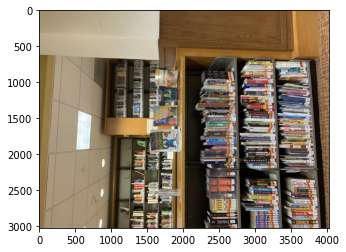

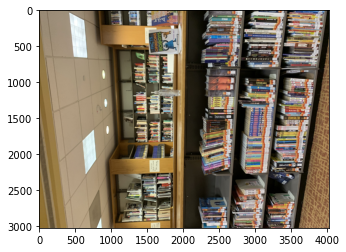

(array([   0,    0,    0, ..., 3023, 3023, 3023]), array([   0,    0,    0, ..., 4031, 4031, 4031]), array([0, 1, 2, ..., 0, 1, 2]))


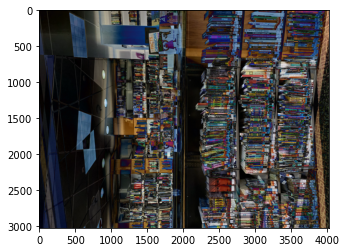

In [ ]:
img1 = Image.open(image1)
img2 = Image.open(image2)

diff = ImageChops.difference(img1, img2)

plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(diff)

if diff.getbbox():
	diff.show()

img3 = np.asarray(diff)
#print(imutils(img3))
indices = np.where(img3 != [0])
coordinates = zip(indices[0], indices[1])
print(indices)

 # how can i find numerical difference, zoom photo close up photo
 # more representing 
 
 

# Identify Keypoints


SubCode for identifying Keypoints and onverting the python code from imread (cv1) to open from Pillow
```
#img1 = cv2.imread(image1)
img1 = Image.open(image1)
#(image/"source1a.jpeg")

#img1 = img1.convert('RGB')
gray = img1.convert('L')
#gray_img1 = ImageOps.grayscale(img1)

#gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img = np.float32(gray)

#harris = cv2.cornerHarris(img, 2, 3, 0.04)
harris = cv2.cornerHarris(img, 2, 3, 0.04)

img1[harris>0.01*harris.max()] = [255, 0, 0]

plt.imshow(img1)
#use cv2.imshow("Harris", img1) in Rasberrypi

cv2.waitKey(0)
```



-1

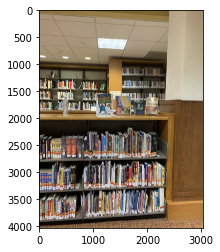

In [ ]:
img1 = cv2.imread(image1)
#(image/"source1a.jpeg")
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

harris = cv2.cornerHarris(gray, 2, 3, 0.04)

img1[harris>0.01*harris.max()] = [255, 0, 0]

img_rgb = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
#use cv2.imshow("Harris", img1) in Rasberrypi

cv2.waitKey(0)

# SIFT


> Using SIFT example from [this link](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_08_features/sift.ipynb) 


> Article about image matching click [this link](https://www.autodesk.com/products/fusion-360/blog/march-2021-product-update-whats-new/)


> Using xFeatures in code [this link](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_08_features/sift.ipynb#scrollTo=3d7lR3VJxpk1)



> SIFT code is adapted from: [this link](https://towardsdatascience.com/image-stitching-using-opencv-817779c86a83)










##Converting images to arrays 


In [ ]:
rgb_l = cv2.cvtColor(cv2.imread(image1), cv2.COLOR_BGR2RGB)
gray_l = cv2.cvtColor(rgb_l, cv2.COLOR_RGB2GRAY)
rgb_r = cv2.cvtColor(cv2.imread(image2), cv2.COLOR_BGR2RGB)
gray_r = cv2.cvtColor(rgb_r, cv2.COLOR_RGB2GRAY)


##**SIFT feature detection and description**

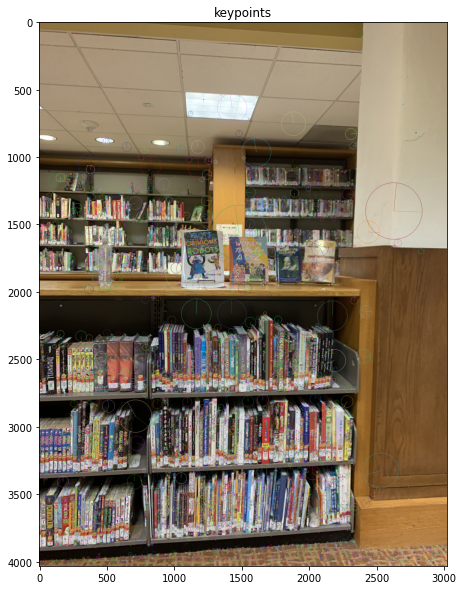

In [ ]:
# use orb if sift is not installed
feature_extractor = cv2.SIFT_create()


# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = feature_extractor.detectAndCompute(gray_l, None)
kp_r, desc_r = feature_extractor.detectAndCompute(gray_r, None)

test = cv2.drawKeypoints(rgb_l, kp_l, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(test)
plt.title("keypoints")
plt.show()

##**ORB Test**


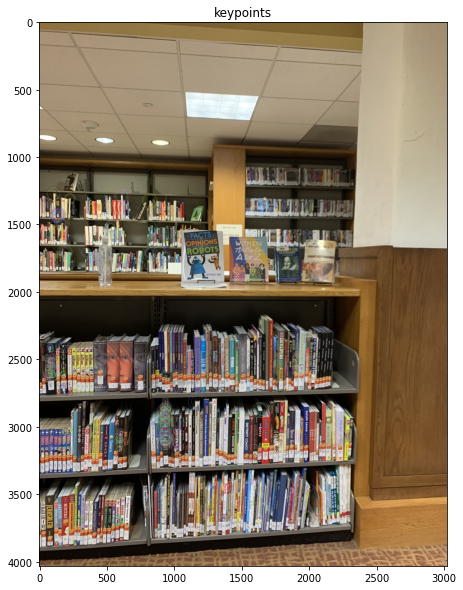

In [ ]:
# use orb if sift is not installed
feature_extractor = cv2.ORB_create()


# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = feature_extractor.detectAndCompute(gray_l, None)
kp_r, desc_r = feature_extractor.detectAndCompute(gray_r, None)

test = cv2.drawKeypoints(rgb_l, kp_l, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(test)
plt.title("keypoints")
plt.show()

## When comparing 2 images through keypoints and SIFT


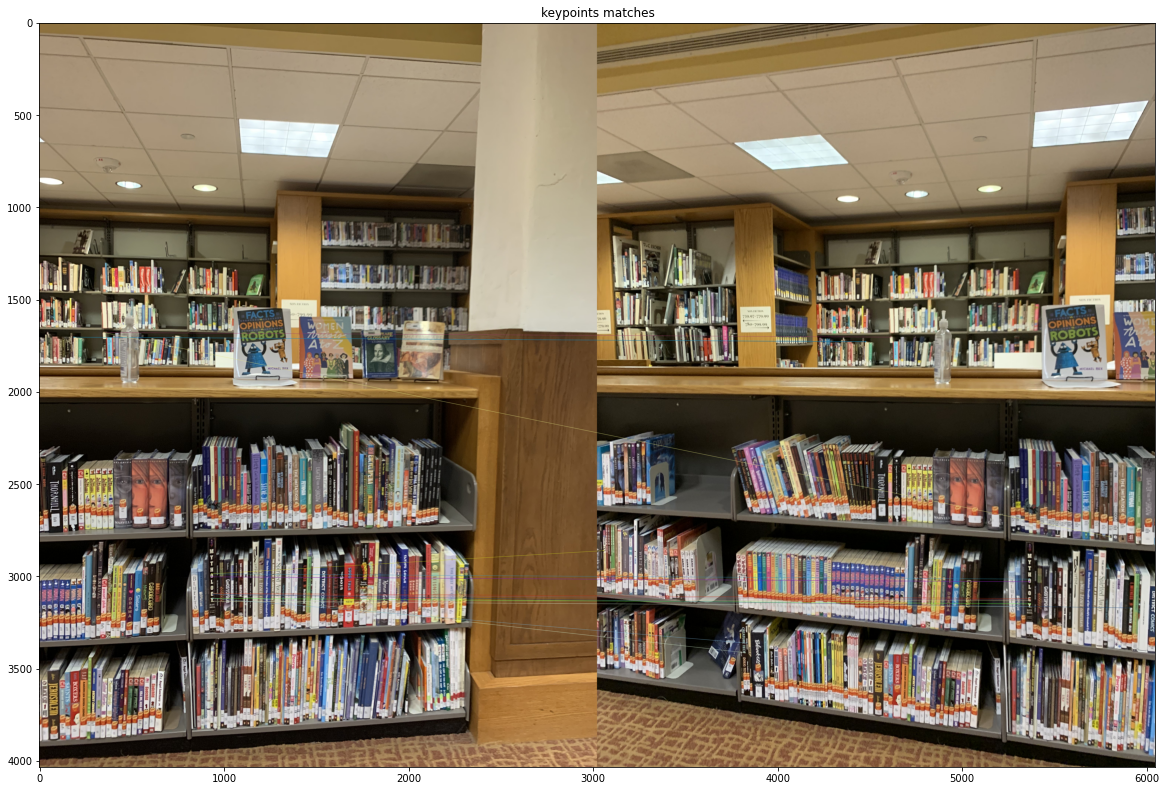

In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_l, desc_r, k=2)

# Apply ratio test
good_match = []
for m in matches:
    if m[0].distance/m[1].distance < 0.5:
        good_match.append(m)
good_match_arr = np.asarray(good_match)

# show only 30 matches
im_matches = cv2.drawMatchesKnn(rgb_l, kp_l, rgb_r, kp_r,
                                good_match[0:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 20))
plt.imshow(im_matches)
plt.title("keypoints matches")
plt.show()


#print ("Difference (percentage):", (dif / 255.0 * 100) / ncomponents)


## Identfying and Matching keypoints


In [ ]:
good_kp_l = np.array([kp_l[m.queryIdx].pt for m in good_match_arr[:, 0]]).reshape(-1, 1, 2)
good_kp_r = np.array([kp_r[m.trainIdx].pt for m in good_match_arr[:, 0]]).reshape(-1, 1, 2)
H, masked = cv2.findHomography(good_kp_r, good_kp_l, cv2.RANSAC, 5.0)

print(H)

[[ 1.34810817e+01  3.30321912e-02 -1.78344783e+04]
 [ 1.13517995e+01  1.38316802e+01 -2.40385787e+04]
 [ 6.24389966e-03 -2.70442423e-04  1.00000000e+00]]


# Compare Percent Difference


Percent Difference


In [ ]:
img1 = Image.open(image1)
img2 = Image.open(image2)
#assert img1.mode == img2.mode, "Different kinds of images."
#assert img1.size == img2.size, "Different sizes."
 
pairs = zip(img1.getdata(), img2.getdata())
if len(img1.getbands()) == 1:
    # for gray-scale jpegs
    dif = sum(abs(p1-p2) for p1,p2 in pairs)
else:
    dif = sum(abs(c1-c2) for p1,p2 in pairs for c1,c2 in zip(p1,p2))
 
ncomponents = img1.size[0] * img1.size[1] * 3
print ("Difference (percentage):", (dif / 255.0 * 100) / ncomponents)
difPercent = (dif / 255.0 * 100) / ncomponents

Difference (percentage): 21.888872297032666


In [ ]:
if difPercent > 5:
  img1 = Image.open(path + 'source1.jpeg')
  img2 = Image.open(path + 'target1.jpeg')
  pairs = zip(img1.getdata(), img2.getdata())
  if len(img1.getbands()) == 1:
    # for gray-scale jpegs
    dif = sum(abs(p1-p2) for p1,p2 in pairs)
  else:
    dif = sum(abs(c1-c2) for p1,p2 in pairs for c1,c2 in zip(p1,p2))
  
  ncomponents = img1.size[0] * img1.size[1] * 3
  print ("Difference (percentage):", (dif / 255.0 * 100) / ncomponents)


sudo Code:
image alignment

Imae


imgMultiple = Image.open(Path + all my images)
compare image 
image difference (prints)
image with the lowest difference (store data)

area between 
ORB/SIFT = look at similarity at different angles
Can compare it 


sift function



keep order of all images

Sift
compute image difference

Orb
compute image difference
_____
